# RELEVAGAN

<a id="CGAN"><h1>Import Header</h1></a>

In [1]:
# from google.colab import drive 
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/PhD/Development/code/RELEVAGAN

In [2]:
# !pip install tensorflow
# !pip install gym
# !pip install keras
# !pip install keras-rl2

# !pip install keras-rl2


In [3]:
# %cd /content/drive/My Drive/PhD/Development/code/RELEVAGAN
# !ls

In [4]:
import importlib
import header

importlib.reload(header) # For reloading after making changes
from header import *

/home/nu/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index



<a id="CGAN"><h1>Select GAN and Dataset and Flags</h1></a>

In [5]:
GAN_type = 'RELEVAGAN_CC'
# GAN_type = 'ACGAN_CV'
# GAN_type = 'EVAGAN_CV'


# DATA_SET = 'ISCX-2014'
DATA_SET = 'CIC-2017'
#DATA_SET = 'CIC-2018'

<a id="GPU Settings"><h2>Set Flags</h2></a>

In [6]:
begin_from_start = 0
take_chunk = 0
required_epochs = 150

DISPLAY_FEATURES = 0
EVALUATION_PARAMETER = 'Accuracy'
SAVE_ONLY_BOT_DATA = 0
USE_KMEANS_FOR_CLASSIFICATION = 1

BALANCE_THE_DATASET = 1

labels =[]

USE_ONLY_TRAIN_SET = 1

USE_ALL_CLASSIFIERS = 0

ACCU_EVAL_TEST = 0
RCL_EVAL_TEST = 0

VISUAL_TEST_OVERLAPPING = 1

CSV_ONE_BOT = 0

VIEW_ALL_BOTS = 0

CTU_NERIS = 0

SINGLE_WEIGHT_CLASSIFIER_TEST_C2ST = 0
SINGLE_WEIGHT_CLASSIFIER_TEST_PROPOSED_METHODOLOGY = 0

C2ST_BLACK_BOX_TEST = 0
BOTSHOT_BLACK_BOX_TEST = 0

C2ST_BLACK_BOX_TEST_AFTER_GAN_TRAINING = 0
BOTSHOT_BLACK_BOX_TEST_AFTER_GAN_TRAINING = 0

GENERATE_OTHERS_DATA = 1

<a id="CGAN"><h1>Set Paths</h1></a>

In [7]:
MAIN_CODE_PATH = os.getcwd()

In [8]:
DATA_SET_PATH = MAIN_CODE_PATH + '/Dataset/' +  DATA_SET + '/'
CACHE_PATH = MAIN_CODE_PATH + '/cache/' + GAN_type + '/'
FIGS_PATH = MAIN_CODE_PATH  + '/figs/' + GAN_type + '/'

In [9]:
print(DATA_SET_PATH)
print(CACHE_PATH)
print(FIGS_PATH)

/home/nu/Insync/rhr407@gmail.com/Google Drive/PhD/Development/code/RELEVAGAN_DQN_Agent/Dataset/CIC-2017/
/home/nu/Insync/rhr407@gmail.com/Google Drive/PhD/Development/code/RELEVAGAN_DQN_Agent/cache/RELEVAGAN_CC/
/home/nu/Insync/rhr407@gmail.com/Google Drive/PhD/Development/code/RELEVAGAN_DQN_Agent/figs/RELEVAGAN_CC/


<a id="GPU Settings"><h2>Check Available GPUs</h2></a>

In [10]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  3


<a id="GPU Settings"><h2>Import Dataset</h2></a>

In [11]:
%cd $DATA_SET_PATH
!ls

/home/nu/Insync/rhr407@gmail.com/Google Drive/PhD/Development/code/RELEVAGAN_DQN_Agent/Dataset/CIC-2017
 CIC_Friday_bot.csv  'CIC_Friday_bot.csv_(Preprocessed).csv'


In [12]:
if begin_from_start:        

    if DATA_SET == 'ISCX-2014':
        training_data = prepare_ISCX_2014_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'ISCX_Botnet-Training.pcap_Flow.csv')       
    
    elif DATA_SET == 'CIC-2017':
        training_data = prepare_cic_2017_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'CIC_Friday_bot.csv')
                
    elif DATA_SET == 'CIC-2018':
        training_data = prepare_cic_2018_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')
                
    elif DATA_SET == 'UNSW_BotIoT':
        training_data = prepare_UNSW_IoT(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'UNSW_2018_IoT_Botnet_Final_10_best_Training.csv')
                
    elif DATA_SET == 'Darknet':
        training_data = prepare_DARKNET_2020_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'Darknet.csv')
        

    print('Dataset preprocessed: ' + DATA_SET)
    
else:

    if DATA_SET == 'ISCX-2014':
        INPUT_TRAINING_FILE_NAME = r'ISCX_Botnet-Training.pcap_Flow.csv_VIRUT'        
        
    elif DATA_SET == 'CIC-2017':
        INPUT_TRAINING_FILE_NAME = r'CIC_Friday_bot.csv'  
        
    elif DATA_SET == 'CIC-2018':
        INPUT_TRAINING_FILE_NAME = r'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv'       
        
    elif DATA_SET == 'BoT-IoT':
        INPUT_TRAINING_FILE_NAME = r'UNSW_2018_IoT_Botnet_Final_10_best_Training.csv'       
        
    elif DATA_SET == 'Drebin':
        INPUT_TRAINING_FILE_NAME = r'Drebin_API_Dataset.csv'                
        
    elif DATA_SET == 'Darknet':
        INPUT_TRAINING_FILE_NAME = r'Darknet.csv'        

    training_data = pd.read_csv (INPUT_TRAINING_FILE_NAME + '_(Preprocessed).csv', low_memory=False)
    training_data= training_data.drop(['Unnamed: 0'], axis=1)
    
    print('Dataset Imported: ' + DATA_SET)
    print('Training set: '+ str(training_data.shape)) 


Dataset Imported: CIC-2017
Training set: (72330, 68)


In [13]:
training_data = training_data.replace([np.inf, -np.inf], np.nan).dropna(how="any").reset_index(drop=True)
print(training_data.describe())

       FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
count  72330.000000     72330.000000          72330.000000   
mean       0.214622         0.000057              0.000050   
std        0.353401         0.000263              0.000286   
min        0.000000         0.000000              0.000004   
25%        0.000002         0.000000              0.000004   
50%        0.009819         0.000024              0.000014   
75%        0.291335         0.000063              0.000046   
max        1.000000         0.028342              0.037421   

       TotalLengthofFwdPackets  TotalLengthofBwdPackets  FwdPacketLengthMax  \
count             72330.000000             7.233000e+04        72330.000000   
mean                  0.001067             2.277297e-05            0.015710   
std                   0.005919             2.499196e-04            0.034347   
min                   0.000000             0.000000e+00            0.000000   
25%                   0.000005             1.0

<a id="GPU Settings"><h2>Display Features</h2></a>

In [14]:
if DISPLAY_FEATURES: 
    unified_df = training_data.copy()
    X_cols = unified_df.columns[:-1]
    y_cols = unified_df.columns[-1]



    axarr = [[]]*len(X_cols)
    columns = 4
    rows = int( np.ceil( len(X_cols) / columns ) )
    f, fig = plt.subplots( figsize=(columns*2.5, rows*2) )

    f.suptitle('Data Distributions by Feature and Label', size=16)

    for i, col in enumerate(X_cols[:]):
        axarr[i] = plt.subplot2grid( (int(rows), int(columns)), (int(i//columns), int(i%columns)) )


        axarr[i].hist( unified_df.loc[ unified_df.Label == 0, col ] , label=['Normal'], color=('#009933'), alpha=0.5,
                              bins=np.linspace( np.percentile(unified_df[col],0), np.percentile(unified_df[col],100),50 ),
                              density=True )

        axarr[i].hist( unified_df.loc[ unified_df.Label == 1, col ] , label=['Real Bot'], color=['#FF0000'], alpha=0.5,
                              bins=np.linspace( np.percentile(unified_df[col],0), np.percentile(unified_df[col],100),50 ),
                              density=True )

        axarr[i].set_xlabel(col, size=12)
    #     axarr[i].set_ylim([0,1])
        axarr[i].tick_params(axis='both', labelsize=10)
        if i == 0: 
            legend = axarr[i].legend()
            legend.get_frame().set_facecolor('white')
        if i%4 != 0 : 
            axarr[i].tick_params(axis='y', left=True, labelleft=True)
        else:
            axarr[i].set_ylabel('Fraction',size=12)

    plt.tight_layout(rect=[0,0,1,0.95]) # xmin, ymin, xmax, ymax
    # plt.savefig('plots/Engineered_Data_Distributions.png')

    plt.show()
    
# else: 
#     print('Pair Plotting..')
# #     sns.pairplot(training_data, hue="Label")
    
#     sns.pairplot(training_data, vars=['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
#        'Total Length of Fwd Packet', 'Total Length of Bwd Packet'], hue="Label")
    
#     sns.pairplot(penguins, hue="species", markers=["o", "s", "D"])

<a id="GPU Settings"><h2>Select Botnet</h2></a>

In [15]:
normal = training_data.loc[ training_data['Label']==1 ].copy()
bots = training_data.loc[ training_data['Label']==0 ].copy()

print('Normal before chunk: ' + str(normal.shape))    
print('Real Bots before chunk: ' + str(bots.shape)) 

if take_chunk:
    bots = bots[0:512]
    
print('Normal: ' + str(normal.shape))    
print('Real Bots: ' + str(bots.shape)) 

Normal before chunk: (70374, 68)
Real Bots before chunk: (1956, 68)
Normal: (70374, 68)
Real Bots: (1956, 68)


In [16]:
Train = training_data.copy()

In [17]:
bots_count =  pd.DataFrame( [ [np.sum(bots['Label']==i)] for i in np.unique(bots['Label']) ], columns=['count'], index=np.unique(bots['Label']) )

label_cols = [ i for i in bots.columns if 'Label' in i ]
data_cols = [ i for i in bots.columns if i not in label_cols ]

train_no_label = bots[ data_cols ].reset_index(drop=True)

print(bots_count['count'])

0    1956
Name: count, dtype: int64


In [18]:
train_data = bots

<a id="Classification"><h1>Classification</h1></a>

1956
CPU times: user 1.72 s, sys: 122 ms, total: 1.84 s
Wall time: 260 ms


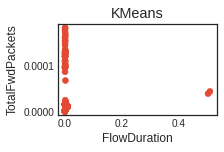

In [19]:
%%time 
# if GAN_type == 'CGAN' or GAN_type == 'WCGAN':
if USE_KMEANS_FOR_CLASSIFICATION:
    algorithms = [ 
    #     [ 'KMeans', cluster.KMeans, (), {'random_state':0} ],
        [ 'KMeans', cluster.KMeans, (), {'n_clusters':1, 'random_state':0} ],
    #     [ 'KMeans 3', cluster.KMeans, (), {'n_clusters':3, 'random_state':0} ],
    #     [ 'Agglomerative', cluster.AgglomerativeClustering, (), {} ],
    #     [ 'Agglomerative', cluster.AgglomerativeClustering, (), {'linkage': 'ward', 'n_clusters': 3} ],
    #     [ 'Agg. Ave 3', cluster.AgglomerativeClustering, (), {'linkage': 'average', 'n_clusters': 3} ],
    #     [ 'Agg. Complete 3', cluster.AgglomerativeClustering, (), {'linkage': 'complete', 'n_clusters': 3} ],
    #     [ 'DBSCAN', cluster.DBSCAN, (), {'eps':0.025} ],
    #     [ 'HDBSCAN', hdbscan.HDBSCAN, (), {} ],
    #     [ 'HDBSCAN', hdbscan.HDBSCAN, (), {'min_cluster_size':10, 'min_samples':1, } ],
    #     [ 'HDBSCAN 2 10', hdbscan.HDBSCAN, (), {'min_cluster_size':2, 'min_samples':10, } ],
    #     [ 'HDBSCAN 10 10 ', hdbscan.HDBSCAN, (), {'min_cluster_size':10, 'min_samples':10, } ],
    ]

    rows = len(algorithms)
    columns = 1
    fig, ax = plt.subplots(3, 2, figsize=(3, 2),
                            constrained_layout=True)

    for i, [name, algorithm, args, kwds] in enumerate(algorithms):

        labels = algorithm(*args, **kwds).fit_predict(train_no_label)
        print(len(labels))
        colors = np.clip(labels,-1,9)
        colors = [ 'C'+str(i) if i>-1 else 'white' for i in colors ]

        plt.subplot(rows,columns,i*columns+1)
        plt.scatter(train_no_label[data_cols[0]], train_no_label[data_cols[1]], c=colors)
        plt.xlabel(data_cols[0]), plt.ylabel(data_cols[1])
        plt.title(name)
            

#     else:
#         labels = train_bots_only['Label'].values.tolist() 
#         sns.set(style="ticks", color_codes=True) # Remove background and grid

#     #     g = sns.scatterplot(data_cols[0],data_cols[1], data=train, hue=labels)

#     #     plt.show() 


#         plt.figure()
#         ax = sns.countplot(y="Label", data=train_bots_only) # for Seaborn version 0.7 and more
#         for p in ax.patches:
#             ax.text(p.get_y() + p.get_width() + 2700 , p.get_y()+p.get_height()-0.1, p.get_width(), ha="center") 

#         ax.set_ylabel('Botnets')

#         plt.savefig('Botnet-Trainset.pdf', dpi=600)
#         plt.show()




#         plt.figure(figsize=(6, 6))
#         ax = sns.countplot(y="Label", data=test_bots_only) # for Seaborn version 0.7 and more
#         for p in ax.patches:
#             ax.text(p.get_y() + p.get_width() + 6000 , p.get_y()+p.get_height()-0.1, p.get_width(), ha="center") 

#         ax.set_ylabel('Botnets')

#         plt.savefig('Botnet-Testset.pdf', dpi=600)
#         plt.show()

#     #     g = sns.catplot(x="class", hue="who", col="survived", data=titanic, kind="count", height=4, aspect=.7);


#     #     sns.pairplot(data=train, vars=[data_cols[0], data_cols[1]], hue='Label')


#     # plt.grid(False)
#     # plt.show()
#     print(train_no_label.describe())
    
    botnet_w_classes = train_no_label.copy()
    botnet_w_classes['Label'] = labels

#     print(botnet_w_classes.describe())
    train_data = botnet_w_classes
    
# else:
#     train_data = train_no_label


In [20]:
train_data['Label']

0       0
1       0
2       0
3       0
4       0
       ..
1951    0
1952    0
1953    0
1954    0
1955    0
Name: Label, Length: 1956, dtype: int32

<a id="GPU Settings"><h2>GAN Training</h2></a>

In [ ]:
import header
import importlib
importlib.reload(header) # For reloading after making changes
from header import *


gpu_device = '/device:GPU:1'
physical_devices = tf.config.list_physical_devices('GPU') 
for gpu_instance in physical_devices: 
    tf.config.experimental.set_memory_growth(gpu_instance, True)

#----------------------------------
# Set neurons and batch size
#----------------------------------
base_n_count = 256
batch_size =  256
#----------------------------------


result = train_data

remaining = train_data.shape[0] % batch_size

if remaining > 0:
    if remaining < train_data.shape[0]:
        additional = batch_size - remaining
        _additional = train_data.loc[train_data.shape[0]-additional:train_data.shape[0],: ]  
        
        frames = [train_data, _additional]
        result = pd.concat(frames).reset_index(drop=True)

print('Result: ' + str(result.shape))

# batch_size = 1
# ---------------------------------
nb_steps = required_epochs * result.shape[0] // batch_size

log_interval = result.shape[0] // batch_size # We are setting this as an epoch. This depends on data size.

print("log_interval : " + str(log_interval))

# nb_steps = TRAINING_ITERATIONS  # 50000 # Add one for logging of the last interval
print("Total Batch Iterations: " + str(nb_steps))
rand_noise_dim = 100 


k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step

critic_pre_train_steps = 100# 100  # number of steps to pre-train the critic before starting adversarial training

generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

show = True 
train = result#.copy().reset_index(drop=True) # botnet only with labels from classification



label_cols = [ i for i in train.columns if 'Label' in i ]

data_cols = [ i for i in train.columns if i not in label_cols ]

print(data_cols)

train_no_label = train[ data_cols ]

train_no_label = round(train_no_label, 4)

# if SAVE_ONLY_BOT_DATA:
#     train_no_label.to_csv(str(DATA_SET_PATH) + 'ONLY_BOTNET_DATA_(Preprocessed).csv')
#     print('File: ' + 'ONLY_BOTNET_DATA_(Preprocessed).csv saved to directory')   



test_size = train.shape[0] 
learning_rate = 5e-4


TODAY = DATA_SET + '_' + str(datetime.datetime.now()) 

print(TODAY)


arguments = [rand_noise_dim, nb_steps, batch_size, 
            k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            CACHE_PATH, FIGS_PATH, show, test_size, gpu_device, EVALUATION_PARAMETER, TODAY, DATA_SET]

best_losses = train_RELEVAGAN_CC(arguments, train, Train, data_cols)
        

Result: (2048, 68)
log_interval : 8
Total Batch Iterations: 1200
['FlowDuration', 'TotalFwdPackets', 'TotalBackwardPackets', 'TotalLengthofFwdPackets', 'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin', 'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax', 'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd', 'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd', 'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd', 'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd', 'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s', 'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength', 'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance', 'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount', 'ACKFlagCount', 'URGFlagCount', 'ECEFlagCount', 'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize', 'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'SubflowFwdPackets',

/home/nu/anaconda3/lib/python3.9/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2022-05-10 10:55:23.893266: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-10 10:55:25.624130: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6003 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070 Ti, pci bus id: 0000:0a:00.0, compute capability: 6.1
2022-05-10 10:55:25.625171: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/rep

/home/nu/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training for 256 steps ...


/home/nu/anaconda3/lib/python3.9/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/home/nu/anaconda3/lib/python3.9/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/home/nu/anaconda3/lib/python3.9/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 256/256: episode: 1, duration: 8.681s, episode steps: 256, steps per second:  29, episode reward: 255.000, mean reward:  0.996 [ 0.000,  1.000], mean action: 5.105 [0.000, 11.000],  loss: 0.294885, mae: 0.757516, mean_q: 1.523243
done, took 8.683 seconds
  g_loss: 1.404856
Evasions: 255
Time left = 54.6 minutes
Total Time Taken: 0.4 minutes
epoch_number: 1 completed
Training for 256 steps ...
 256/256: episode: 1, duration: 3.768s, episode steps: 256, steps per second:  68, episode reward: 254.000, mean reward:  0.992 [ 0.000,  1.000], mean action: 5.219 [0.000, 11.000],  loss: 0.135452, mae: 0.852890, mean_q: 1.606744
done, took 3.770 seconds
Training for 256 steps ...
 256/256: episode: 1, duration: 3.815s, episode steps: 256, steps per second:  67, episode reward: 255.000, mean reward:  0.996 [ 0.000,  1.000], mean action: 5.168 [0.000, 11.000],  loss: 0.086105, mae: 0.877927, mean_q: 1.538393
done, took 3.816 seconds
Training for 256 steps ...
 256/256: episode: 1, duration: 3.708

 256/256: episode: 1, duration: 4.001s, episode steps: 256, steps per second:  64, episode reward: 126.000, mean reward:  0.492 [ 0.000,  1.000], mean action: 4.961 [0.000, 11.000],  loss: 0.033025, mae: 0.895859, mean_q: 1.153208
done, took 4.002 seconds
Training for 256 steps ...
 256/256: episode: 1, duration: 3.956s, episode steps: 256, steps per second:  65, episode reward: 131.000, mean reward:  0.512 [ 0.000,  1.000], mean action: 4.973 [0.000, 11.000],  loss: 0.040924, mae: 0.880809, mean_q: 1.129381
done, took 3.958 seconds
Training for 256 steps ...
 256/256: episode: 1, duration: 4.100s, episode steps: 256, steps per second:  62, episode reward: 135.000, mean reward:  0.527 [ 0.000,  1.000], mean action: 4.992 [0.000, 11.000],  loss: 0.045606, mae: 0.875361, mean_q: 1.117549
done, took 4.102 seconds
Training for 256 steps ...
 256/256: episode: 1, duration: 4.278s, episode steps: 256, steps per second:  60, episode reward: 139.000, mean reward:  0.543 [ 0.000,  1.000], mean 

 256/256: episode: 1, duration: 3.712s, episode steps: 256, steps per second:  69, episode reward: 36.000, mean reward:  0.141 [ 0.000,  1.000], mean action: 5.020 [0.000, 11.000],  loss: 0.119941, mae: 0.708754, mean_q: 0.884821
done, took 3.714 seconds
Training for 256 steps ...
 256/256: episode: 1, duration: 3.964s, episode steps: 256, steps per second:  65, episode reward: 28.000, mean reward:  0.109 [ 0.000,  1.000], mean action: 5.043 [0.000, 11.000],  loss: 0.116093, mae: 0.694025, mean_q: 0.872885
done, took 3.966 seconds
  g_loss: 0.44012237
Evasions: 267
Time left = 58.2 minutes
Total Time Taken: 4.2 minutes
epoch_number: 10 completed
Training for 256 steps ...
 256/256: episode: 1, duration: 3.779s, episode steps: 256, steps per second:  68, episode reward: 116.000, mean reward:  0.453 [ 0.000,  1.000], mean action: 5.016 [0.000, 11.000],  loss: 0.126996, mae: 0.701836, mean_q: 0.874556
done, took 3.781 seconds
Training for 256 steps ...
 256/256: episode: 1, duration: 3.68

 256/256: episode: 1, duration: 3.823s, episode steps: 256, steps per second:  67, episode reward: 21.000, mean reward:  0.082 [ 0.000,  1.000], mean action: 5.047 [0.000, 11.000],  loss: 0.136597, mae: 0.548596, mean_q: 0.699333
done, took 3.825 seconds
Training for 256 steps ...
 256/256: episode: 1, duration: 3.779s, episode steps: 256, steps per second:  68, episode reward:  8.000, mean reward:  0.031 [ 0.000,  1.000], mean action: 5.078 [0.000, 11.000],  loss: 0.134072, mae: 0.532138, mean_q: 0.687950
done, took 3.781 seconds
Training for 256 steps ...
 256/256: episode: 1, duration: 3.838s, episode steps: 256, steps per second:  67, episode reward:  7.000, mean reward:  0.027 [ 0.000,  1.000], mean action: 5.066 [0.000, 11.000],  loss: 0.133037, mae: 0.519580, mean_q: 0.668975
done, took 3.840 seconds
Training for 256 steps ...
 256/256: episode: 1, duration: 3.798s, episode steps: 256, steps per second:  67, episode reward:  7.000, mean reward:  0.027 [ 0.000,  1.000], mean acti

 256/256: episode: 1, duration: 3.721s, episode steps: 256, steps per second:  69, episode reward:  3.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 5.031 [0.000, 11.000],  loss: 0.125247, mae: 0.452138, mean_q: 0.576060
done, took 3.723 seconds
Training for 256 steps ...
 256/256: episode: 1, duration: 3.914s, episode steps: 256, steps per second:  65, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 5.043 [0.000, 11.000],  loss: 0.122427, mae: 0.455138, mean_q: 0.588338
done, took 3.916 seconds
  g_loss: 0.31557196
Evasions: 11
Time left = 54.6 minutes
Total Time Taken: 7.9 minutes
epoch_number: 19 completed
Training for 256 steps ...
 256/256: episode: 1, duration: 3.899s, episode steps: 256, steps per second:  66, episode reward:  2.000, mean reward:  0.008 [ 0.000,  1.000], mean action: 5.047 [0.000, 11.000],  loss: 0.123748, mae: 0.445601, mean_q: 0.561150
done, took 3.901 seconds
Training for 256 steps ...
 256/256: episode: 1, duration: 3.788s